# I. Introduction

Data is coming from: https://archive.ics.uci.edu/ml/index.php


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

tf.__version__



'2.5.0'

# 2. Import a Data-Set


In [ ]:
pp_file_name = "/content/drive/MyDrive/Data analytics course/PP_Data.csv"
pp_df = pd.read_csv(pp_file_name)
pp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#X
independant_var = pp_df.iloc[:, :-1].values

#y
dependant_var = pp_df.iloc[:, -1].values

In [ ]:
independant_var

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [ ]:
dependant_var #pēdējā kolonna

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

#3. Pre-processing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independant_var, dependant_var, test_size=0.2, random_state=0)

**a) Building ANN.**

*a.1) ANN Initialization*

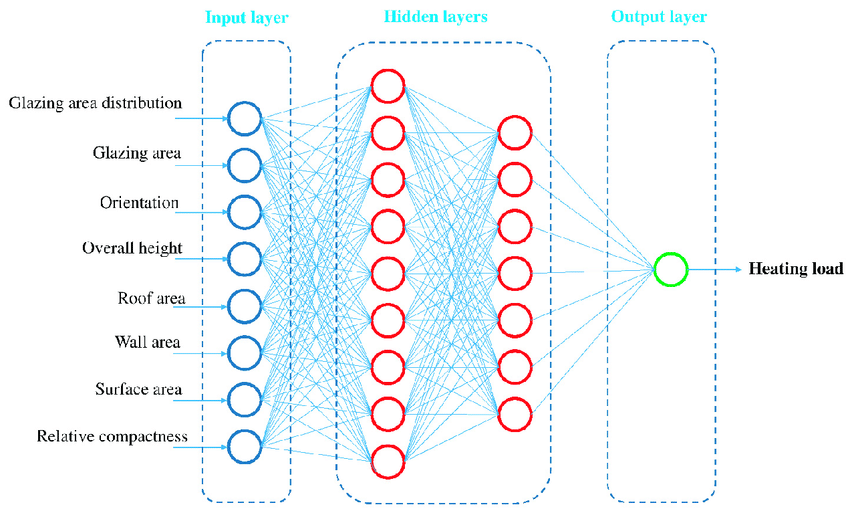

Bomparing **TensorFlow** and **Keras** isn’t the best way to approach the question since **Keras** functions as a wrapper to **TensorFlow’s** framework. Thus, you can define a model with **Keras’** interface, which is easier to use, then drop down into **TensorFlow** when you need to use a feature that **Keras** doesn’t have, or you’re looking for specific **TensorFlow** functionality. Thus, you can place your **TensorFlow** code directly into the **Keras** training pipeline or model.

In [ ]:
pp_ann = tf.keras.Sequential()

*a.2) Create Input and fisrt Hidden layers*


Since we have all Input nodes fully connected to first hidden layer - we will use Dense class from layers introduced in Keras.

In [ ]:
pp_ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

*a.3) Create next Hidden layers*


In [ ]:
pp_ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

*a.3) Create Output layers*

In [ ]:
pp_ann.add(tf.keras.layers.Dense(units=1))

# 4. Training of ANN Model

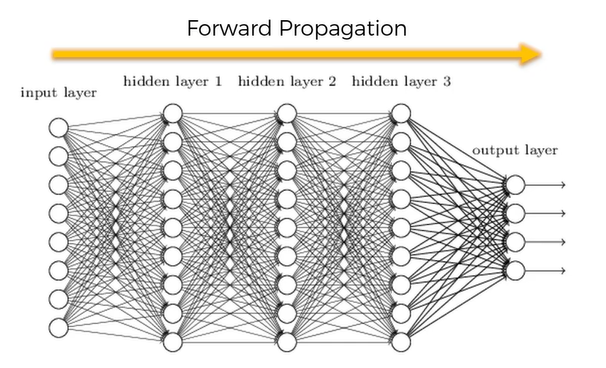

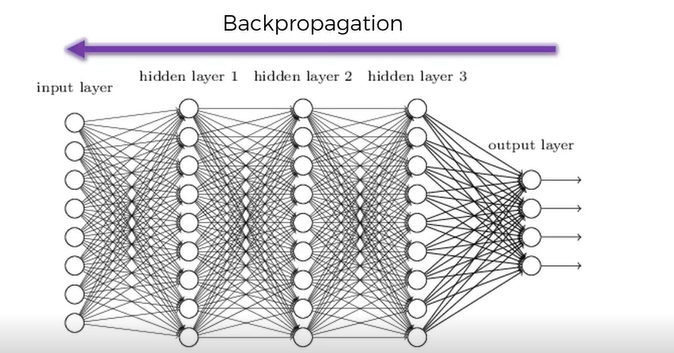

**a) Compile ANN**

https://keras.io/api/losses/

In [ ]:
pp_ann.compile(optimizer="adam", loss="mean_squared_error") #savieno slāņu kopā

**a) Train ANN**

In [ ]:
pp_ann.fit(X_train, y_train, batch_size=32, epochs=100) #batch_size - atmiņas apjoms, parasti izmanto 32, epochs cik cikli iet modelim apmācībā

**5. Validate ANN Result**

In [ ]:
y_pred = pp_ann.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_multy = r2_score(y_test, y_pred)
r2_score_multy*100
#91% joprojām labs rezultāts

91.59484164991044